# Neural Network Exercise

# QUESTION 1

[i] Try different number of hidden layers, number of neurons and changing the activation function
[ii] Plot the residual, training and testing.
[iii] Report your findings

1. Try different number of hidden layers, number of neurons and changing the activation function

In [18]:
# Importing the necessary libraries

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# The dataset to carry out this exercise is generated using Scikit-learn dataset library. 
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=500, n_features=10,
                       noise=1, random_state=42)

In [20]:
# Then before performing the regression, the dataset undergoes pre-processing. In this exercise
# the dataset is standardized

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
#Then the dataset is split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=42)

In [22]:
# Implementation of the neural network model with 5 hidden layers of 32 to 128 neutrons
#and tanh activation function using Keras. 

model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), epochs=100,
                    batch_size=32, verbose=0)


2. Ploting the residual, training and testing.

In [23]:
# To plot the residual, linear regresssion needs to be implemeted first
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LinearR = LinearRegression()
LinearR.fit(X_train, y_train)
y_pred = LinearR.predict(X_test)

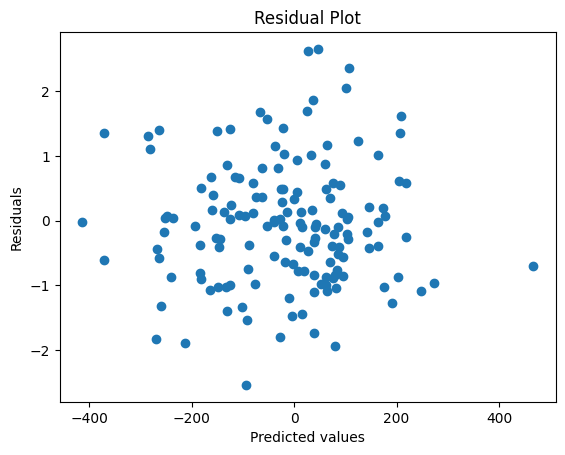

In [24]:
import matplotlib.pyplot as plt
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

In [25]:
# To evaluate the performance of the regression problem

mse_train = model.evaluate(X_train, y_train, verbose=0)
mse_test = model.evaluate(X_test, y_test, verbose=0)
print("Training Mean Squared Error: ", mse_train)
print("Testing Mean Squared Error: ", mse_test)

Training Mean Squared Error:  13334.9228515625
Testing Mean Squared Error:  13329.6337890625


3. Report on my findings

In this exercise, the necessary libraries such as numpy, scikit-learn and matplotlib, were first imported. Then, a dataset of 5000 instances and 10 features was generated from sckit-learn datasets library. From the dataset, the independent variable X and dependent variable y were separated.

As part of the pre-processing step, the data was standardized using the standardscaler. The dataset were then split into training and testing sets with ratio 7:3 (that is, 70% training and 30% testing). 
After this, the neural network model is implememted.

As required for this exercise, the number of hidden layers, neutrons and activation function is changed. The number of hidden layer is changed from 2 to 5 with 128, 64, 64, 32 and 32 neutrons as opposed to the 64 neutrons in the former file. And the activation function is changed from ReLU to tanh.

I plotted the residual for training and testing but there is little to no change in this plot as compared to the former one. And since the residuals centring around zero is a make up of a good model, my model, with the changed hidden layer, neutrons and activation function, is fitting for the dataset.

For the training and testing mean-squared error, I got high values of over 13,000 for both. This is a clear indication that my neural network greatly deviate from the true output.
 

# QUESTION 2

[i] Try different number of hidden layers, number of neurons and changing the activation function
[ii] Plot the residual, training and testing error.
[iii] Report your findings

For this question, the Iris Dataset is used.

1. Trying different number of hidden layers, number of neurons and changing the activation function

In [26]:
# The iris dataset and necessary libraries are imported first

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Separating the independent variable X and dependent variable y from the dataset.

iris = load_iris()
X = iris.data
y = iris.target

In [28]:
# Pre-processing the datasets

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = to_categorical(y)

In [29]:
# Splitting the iris dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [30]:
# Using Keras, the neural network model is implemented with 4 hidden layers of 16 to 128 neutrons 
# and the tanh activation function.

model = Sequential()
model.add(Dense(128, activation='tanh', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=1000, batch_size=32)

Epoch 1/1000
4/4 [==============================] - 2s 179ms/step - loss: 0.8865 - accuracy: 0.5524 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 2/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.5330 - accuracy: 0.8095 - val_loss: 0.4218 - val_accuracy: 0.8222
Epoch 3/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.4310 - accuracy: 0.8286 - val_loss: 0.3928 - val_accuracy: 0.8444
Epoch 4/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.3889 - accuracy: 0.8381 - val_loss: 0.3754 - val_accuracy: 0.8444
Epoch 5/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.3596 - accuracy: 0.8381 - val_loss: 0.3612 - val_accuracy: 0.8444
Epoch 6/1000
4/4 [==============================] - 0s 35ms/step - loss: 0.3395 - accuracy: 0.8571 - val_loss: 0.3480 - val_accuracy: 0.8667
Epoch 7/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.3208 - accuracy: 0.8857 - val_loss: 0.3371 - val_accuracy: 0.8667
Epoch 8/1000

Epoch 59/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0791 - accuracy: 0.9619 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 60/1000
4/4 [==============================] - 0s 40ms/step - loss: 0.0660 - accuracy: 0.9810 - val_loss: 0.0295 - val_accuracy: 1.0000
Epoch 61/1000
4/4 [==============================] - 0s 45ms/step - loss: 0.0746 - accuracy: 0.9810 - val_loss: 0.0249 - val_accuracy: 1.0000
Epoch 62/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0688 - accuracy: 0.9810 - val_loss: 0.0237 - val_accuracy: 1.0000
Epoch 63/1000
4/4 [==============================] - 0s 42ms/step - loss: 0.0706 - accuracy: 0.9810 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 64/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.0679 - accuracy: 0.9810 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 65/1000
4/4 [==============================] - 0s 41ms/step - loss: 0.0733 - accuracy: 0.9714 - val_loss: 0.0412 - val_accuracy: 0.9778
Epoch 

4/4 [==============================] - 0s 33ms/step - loss: 0.0570 - accuracy: 0.9810 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 117/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0572 - accuracy: 0.9810 - val_loss: 0.0198 - val_accuracy: 1.0000
Epoch 118/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0707 - accuracy: 0.9714 - val_loss: 0.0210 - val_accuracy: 1.0000
Epoch 119/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0719 - accuracy: 0.9714 - val_loss: 0.0466 - val_accuracy: 0.9778
Epoch 120/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0988 - accuracy: 0.9619 - val_loss: 0.0479 - val_accuracy: 0.9778
Epoch 121/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0872 - accuracy: 0.9619 - val_loss: 0.0372 - val_accuracy: 0.9778
Epoch 122/1000
4/4 [==============================] - 0s 32ms/step - loss: 0.0581 - accuracy: 0.9714 - val_loss: 0.0913 - val_accuracy: 0.9556
Epoch 123/1000

4/4 [==============================] - 0s 31ms/step - loss: 0.0525 - accuracy: 0.9810 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 174/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0260 - val_accuracy: 1.0000
Epoch 175/1000
4/4 [==============================] - 0s 39ms/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 176/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0490 - accuracy: 0.9810 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 177/1000
4/4 [==============================] - 0s 34ms/step - loss: 0.0504 - accuracy: 0.9810 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 178/1000
4/4 [==============================] - 0s 33ms/step - loss: 0.0488 - accuracy: 0.9810 - val_loss: 0.0167 - val_accuracy: 1.0000
Epoch 179/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0502 - accuracy: 0.9810 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 180/1000

4/4 [==============================] - 0s 34ms/step - loss: 0.0375 - accuracy: 0.9905 - val_loss: 0.0529 - val_accuracy: 0.9778
Epoch 231/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0373 - accuracy: 0.9905 - val_loss: 0.0598 - val_accuracy: 0.9778
Epoch 232/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0388 - accuracy: 0.9905 - val_loss: 0.0708 - val_accuracy: 0.9778
Epoch 233/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0384 - accuracy: 0.9810 - val_loss: 0.0756 - val_accuracy: 0.9778
Epoch 234/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0408 - accuracy: 0.9810 - val_loss: 0.0643 - val_accuracy: 0.9778
Epoch 235/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0363 - accuracy: 0.9905 - val_loss: 0.0481 - val_accuracy: 0.9778
Epoch 236/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0357 - accuracy: 0.9905 - val_loss: 0.0441 - val_accuracy: 0.9778
Epoch 237/1000

4/4 [==============================] - 0s 27ms/step - loss: 0.0275 - accuracy: 0.9905 - val_loss: 0.0898 - val_accuracy: 0.9778
Epoch 288/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0250 - accuracy: 0.9905 - val_loss: 0.1017 - val_accuracy: 0.9778
Epoch 289/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.0165 - accuracy: 0.9905 - val_loss: 0.1133 - val_accuracy: 0.9778
Epoch 290/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1118 - val_accuracy: 0.9778
Epoch 291/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1023 - val_accuracy: 0.9778
Epoch 292/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0157 - accuracy: 0.9905 - val_loss: 0.0885 - val_accuracy: 0.9778
Epoch 293/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0153 - accuracy: 0.9905 - val_loss: 0.0835 - val_accuracy: 0.9778
Epoch 294/1000

4/4 [==============================] - 0s 33ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1141 - val_accuracy: 0.9778
Epoch 345/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9778
Epoch 346/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0999 - val_accuracy: 0.9778
Epoch 347/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0970 - val_accuracy: 0.9778
Epoch 348/1000
4/4 [==============================] - 0s 60ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0956 - val_accuracy: 0.9778
Epoch 349/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9778
Epoch 350/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.1015 - val_accuracy: 0.9778
Epoch 351/1000

4/4 [==============================] - 0s 33ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9778
Epoch 402/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9778
Epoch 403/1000
4/4 [==============================] - 0s 44ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1181 - val_accuracy: 0.9778
Epoch 404/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1175 - val_accuracy: 0.9778
Epoch 405/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 0.9778
Epoch 406/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.1307 - val_accuracy: 0.9778
Epoch 407/1000
4/4 [==============================] - 0s 25ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.1364 - val_accuracy: 0.9778
Epoch 408/1000

4/4 [==============================] - 0s 31ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1464 - val_accuracy: 0.9778
Epoch 459/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1358 - val_accuracy: 0.9778
Epoch 460/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9778
Epoch 461/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1231 - val_accuracy: 0.9778
Epoch 462/1000
4/4 [==============================] - 0s 27ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.1237 - val_accuracy: 0.9778
Epoch 463/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9778
Epoch 464/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1289 - val_accuracy: 0.9778
Epoch 465/1000

4/4 [==============================] - 0s 33ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1390 - val_accuracy: 0.9778
Epoch 516/1000
4/4 [==============================] - 0s 36ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9778
Epoch 517/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1402 - val_accuracy: 0.9778
Epoch 518/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1406 - val_accuracy: 0.9778
Epoch 519/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1408 - val_accuracy: 0.9778
Epoch 520/1000
4/4 [==============================] - 0s 37ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 0.9778
Epoch 521/1000
4/4 [==============================] - 0s 38ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1396 - val_accuracy: 0.9778
Epoch 522/1000

Epoch 572/1000
4/4 [==============================] - 0s 29ms/step - loss: 9.1696e-04 - accuracy: 1.0000 - val_loss: 0.1440 - val_accuracy: 0.9778
Epoch 573/1000
4/4 [==============================] - 0s 27ms/step - loss: 9.0823e-04 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9778
Epoch 574/1000
4/4 [==============================] - 0s 27ms/step - loss: 9.1300e-04 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9778
Epoch 575/1000
4/4 [==============================] - 0s 25ms/step - loss: 8.9700e-04 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9778
Epoch 576/1000
4/4 [==============================] - 0s 25ms/step - loss: 9.3206e-04 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9778
Epoch 577/1000
4/4 [==============================] - 0s 26ms/step - loss: 9.5215e-04 - accuracy: 1.0000 - val_loss: 0.1449 - val_accuracy: 0.9778
Epoch 578/1000
4/4 [==============================] - 0s 27ms/step - loss: 9.7086e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 628/1000
4/4 [==============================] - 0s 36ms/step - loss: 6.9695e-04 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9778
Epoch 629/1000
4/4 [==============================] - 0s 38ms/step - loss: 7.0887e-04 - accuracy: 1.0000 - val_loss: 0.1446 - val_accuracy: 0.9778
Epoch 630/1000
4/4 [==============================] - 0s 38ms/step - loss: 7.1900e-04 - accuracy: 1.0000 - val_loss: 0.1456 - val_accuracy: 0.9778
Epoch 631/1000
4/4 [==============================] - 0s 39ms/step - loss: 7.1644e-04 - accuracy: 1.0000 - val_loss: 0.1465 - val_accuracy: 0.9778
Epoch 632/1000
4/4 [==============================] - 0s 39ms/step - loss: 7.1627e-04 - accuracy: 1.0000 - val_loss: 0.1478 - val_accuracy: 0.9778
Epoch 633/1000
4/4 [==============================] - 0s 37ms/step - loss: 6.5378e-04 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9778
Epoch 634/1000
4/4 [==============================] - 0s 37ms/step - loss: 7.2807e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 684/1000
4/4 [==============================] - 0s 30ms/step - loss: 5.6991e-04 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9778
Epoch 685/1000
4/4 [==============================] - 0s 30ms/step - loss: 5.6575e-04 - accuracy: 1.0000 - val_loss: 0.1399 - val_accuracy: 0.9778
Epoch 686/1000
4/4 [==============================] - 0s 32ms/step - loss: 5.5238e-04 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9778
Epoch 687/1000
4/4 [==============================] - 0s 31ms/step - loss: 5.4317e-04 - accuracy: 1.0000 - val_loss: 0.1312 - val_accuracy: 0.9778
Epoch 688/1000
4/4 [==============================] - 0s 31ms/step - loss: 5.5397e-04 - accuracy: 1.0000 - val_loss: 0.1302 - val_accuracy: 0.9778
Epoch 689/1000
4/4 [==============================] - 0s 30ms/step - loss: 5.4317e-04 - accuracy: 1.0000 - val_loss: 0.1326 - val_accuracy: 0.9778
Epoch 690/1000
4/4 [==============================] - 0s 33ms/step - loss: 5.4288e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 740/1000
4/4 [==============================] - 0s 29ms/step - loss: 4.4965e-04 - accuracy: 1.0000 - val_loss: 0.1497 - val_accuracy: 0.9778
Epoch 741/1000
4/4 [==============================] - 0s 29ms/step - loss: 4.3689e-04 - accuracy: 1.0000 - val_loss: 0.1475 - val_accuracy: 0.9778
Epoch 742/1000
4/4 [==============================] - 0s 28ms/step - loss: 4.4926e-04 - accuracy: 1.0000 - val_loss: 0.1460 - val_accuracy: 0.9778
Epoch 743/1000
4/4 [==============================] - 0s 27ms/step - loss: 4.5478e-04 - accuracy: 1.0000 - val_loss: 0.1459 - val_accuracy: 0.9778
Epoch 744/1000
4/4 [==============================] - 0s 27ms/step - loss: 4.5751e-04 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9778
Epoch 745/1000
4/4 [==============================] - 0s 27ms/step - loss: 4.4788e-04 - accuracy: 1.0000 - val_loss: 0.1490 - val_accuracy: 0.9778
Epoch 746/1000
4/4 [==============================] - 0s 27ms/step - loss: 4.5376e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 796/1000
4/4 [==============================] - 0s 36ms/step - loss: 3.6814e-04 - accuracy: 1.0000 - val_loss: 0.1488 - val_accuracy: 0.9778
Epoch 797/1000
4/4 [==============================] - 0s 37ms/step - loss: 3.6216e-04 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 0.9778
Epoch 798/1000
4/4 [==============================] - 0s 37ms/step - loss: 3.5882e-04 - accuracy: 1.0000 - val_loss: 0.1467 - val_accuracy: 0.9778
Epoch 799/1000
4/4 [==============================] - 0s 38ms/step - loss: 3.6449e-04 - accuracy: 1.0000 - val_loss: 0.1463 - val_accuracy: 0.9778
Epoch 800/1000
4/4 [==============================] - 0s 37ms/step - loss: 3.7473e-04 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.9778
Epoch 801/1000
4/4 [==============================] - 0s 36ms/step - loss: 3.7728e-04 - accuracy: 1.0000 - val_loss: 0.1469 - val_accuracy: 0.9778
Epoch 802/1000
4/4 [==============================] - 0s 37ms/step - loss: 3.6949e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 852/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.0141e-04 - accuracy: 1.0000 - val_loss: 0.1476 - val_accuracy: 0.9778
Epoch 853/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.1101e-04 - accuracy: 1.0000 - val_loss: 0.1494 - val_accuracy: 0.9778
Epoch 854/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.0180e-04 - accuracy: 1.0000 - val_loss: 0.1530 - val_accuracy: 0.9778
Epoch 855/1000
4/4 [==============================] - 0s 29ms/step - loss: 3.0155e-04 - accuracy: 1.0000 - val_loss: 0.1548 - val_accuracy: 0.9778
Epoch 856/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.0528e-04 - accuracy: 1.0000 - val_loss: 0.1555 - val_accuracy: 0.9778
Epoch 857/1000
4/4 [==============================] - 0s 27ms/step - loss: 3.0747e-04 - accuracy: 1.0000 - val_loss: 0.1557 - val_accuracy: 0.9778
Epoch 858/1000
4/4 [==============================] - 0s 28ms/step - loss: 3.0516e-04 - accuracy: 1.0000 - val_loss: 0

Epoch 908/1000
4/4 [==============================] - 0s 36ms/step - loss: 2.5632e-04 - accuracy: 1.0000 - val_loss: 0.1508 - val_accuracy: 0.9778
Epoch 909/1000
4/4 [==============================] - 0s 38ms/step - loss: 2.5666e-04 - accuracy: 1.0000 - val_loss: 0.1519 - val_accuracy: 0.9778
Epoch 910/1000
4/4 [==============================] - 1s 211ms/step - loss: 2.5589e-04 - accuracy: 1.0000 - val_loss: 0.1517 - val_accuracy: 0.9778
Epoch 911/1000
4/4 [==============================] - 0s 57ms/step - loss: 2.5594e-04 - accuracy: 1.0000 - val_loss: 0.1525 - val_accuracy: 0.9778
Epoch 912/1000
4/4 [==============================] - 0s 66ms/step - loss: 2.5271e-04 - accuracy: 1.0000 - val_loss: 0.1531 - val_accuracy: 0.9778
Epoch 913/1000
4/4 [==============================] - 0s 62ms/step - loss: 2.5158e-04 - accuracy: 1.0000 - val_loss: 0.1537 - val_accuracy: 0.9778
Epoch 914/1000
4/4 [==============================] - 0s 48ms/step - loss: 2.4977e-04 - accuracy: 1.0000 - val_loss: 

Epoch 964/1000
4/4 [==============================] - 0s 32ms/step - loss: 2.1883e-04 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9778
Epoch 965/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.1630e-04 - accuracy: 1.0000 - val_loss: 0.1630 - val_accuracy: 0.9778
Epoch 966/1000
4/4 [==============================] - 0s 31ms/step - loss: 2.1558e-04 - accuracy: 1.0000 - val_loss: 0.1632 - val_accuracy: 0.9778
Epoch 967/1000
4/4 [==============================] - 0s 29ms/step - loss: 2.1443e-04 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9778
Epoch 968/1000
4/4 [==============================] - 0s 28ms/step - loss: 2.1620e-04 - accuracy: 1.0000 - val_loss: 0.1631 - val_accuracy: 0.9778
Epoch 969/1000
4/4 [==============================] - 0s 31ms/step - loss: 2.1548e-04 - accuracy: 1.0000 - val_loss: 0.1640 - val_accuracy: 0.9778
Epoch 970/1000
4/4 [==============================] - 0s 30ms/step - loss: 2.1367e-04 - accuracy: 1.0000 - val_loss: 0

2/2 [==============================] - 0s 8ms/step


Text(50.722222222222214, 0.5, 'True labels')

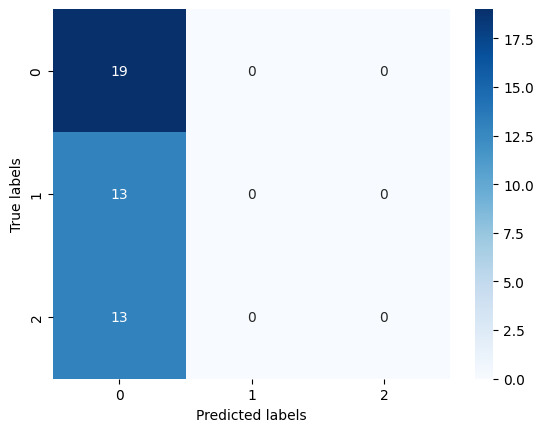

In [30]:
# Computing and plotting the confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

2. Plot the residual training and testing error.

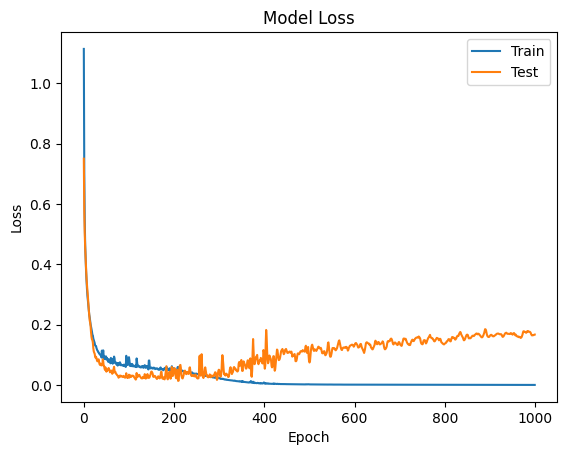

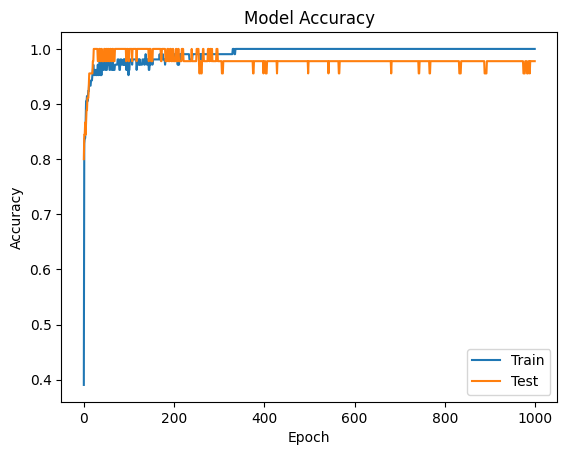

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

3. Report on my findings

In this exercise, the necessary libraries such as keras, scikit-learn and matplotlib, were first imported. Then, the iris dataset was imported from scikit-learn datasets library. From this dataset, the independent variable X and dependent variable y were separated.
As part of the pre-processing step, the data was standardized using the standardscaler. The dataset were then split into training and testing sets with ratio 7:3 (that is, 70% training and 30% testing). 

After this, the neural network model is implememted. As required for this exercise, the number of hidden layers, neutrons and activation function is changed. The number of hidden layer is changed from 3 to 4 with 128, 64, 32 and 16 neutrons as opposed to the neutrons in the former file. And the activation function is changed from ReLU to tanh.

The model produced a val-accuracy of 0.9778 which is close to 1. This is an indication that my model, with the changed hidden layer, neutrons and activation function, is neither underfitted nor overfitting for the dataset.  

I also plotted the residual training and testing but there is a little change in this plot as compared to the former one. The graphs of the training and testing in model loss and accuracy approaching to 0 and 1 respectively, indicates that my neural network model can be considered fitting for the dataset (oversitting or underfitting).

However, on closer observation, the exponetial testing line (orange) in the model loss is observed to have ascended to 0.1 after it reaching its minimum point at 100 epoch. This accounts for slight model loss. This also applies to the exponetial testing line (orange) in the accuracy model observed to descend to 0.98 after it reached its maximum point at roughly 200 epoch. This accounted for slight error in the model accuracy. 